# JavaScript 05 Asynchronous JavaScript

## 비동기

### 개요

#### Synchronous 
##### (동기) 
프로그램의 실행 흐름이 순차적으로 진행 
- >하나의 작업이 완료된 후에 다음 작업이 실행되는 방식

#### Synchronous 예시
1. 카페 커피 주문 예시 
- [손님 1] 아메리카노 한 잔 주세요. 
- [바리스타] 아메리카노 하나요. 주문이 완료될 때까지 잠시만 기다려주세요. 
- [손님 1] 네, 감사합니다. (커피가 나올 때까지 대기) 
- [바리스타] 아메리카노 나왔습니다. 감사합니다. 
- [손님 2] 카페라떼 두 잔 주세요. 
- > 손님 1의 주문이 완료 되어야 만 다음 손님의 주문을 진행 할 수 있음

- 반복이 완료될 때까지 다음 작업(작업 2)이 시작되지 않음 
```js
console.log('작업 1 시작') 

const syncTask = function () { 
    for (let i=0; i < 1000000000; i++) { 
        // 반복 실행 동안 잠시 대기 } return '작업 완료' 
    } 
}

const result = syncTask() 
console.log(result) 

console.log('작업 2 시작') 

// 출력 결과
/*
작업 1 시작 
(반복 실행 동안 잠시 대기) 
작업 완료 
작업 2 시작
*/
```

#### Asynchronous 
##### (비동기) 
특정 작업의 실행이 완료될 때까지 기다리지 않고 다음 작업을 즉시 실행하는 방식 
- >작업의 완료 여부를 신경 쓰지 않고 동시에 다른 작업들을 수행할 수 있음

#### Asynchronous 예시
1. 카페 커피 주문 예시 
- [손님 1] 아메리카노 한 잔 주세요. 
- [바리스타] 아메리카노 하나요. 여기 진동 벨 드리겠습니다. 
- [손님 1] 네, 감사합니다. 
- [바리스타] 안녕하세요. 어떤 거 드릴까요? 
- [손님 2] 카페라떼 두 잔 주세요. 
- > 손님 1의 커피가 만들어지는 동안 다음 손님의 주문을 처리할 수 있음
2. Gmail에서 메일 전송을 누르면 목록 화면으로 전환되지만 실제로 메일을 보내는 작업은 병렬적으로 별도로 처리됨
3. 브라우저는 웹페이지를 먼저 처리되는 요소부터 그려 나가며 처리가 오래 걸리는 것들은 별도로 처리가 완료 되는대로 병렬적으로 진행

    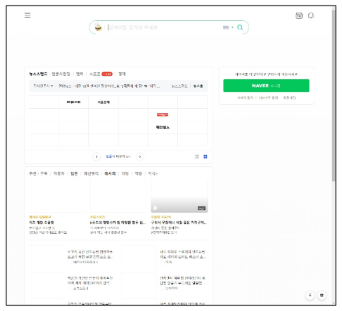
```js
console.log('작업 1 시작') 

const asyncTask = function (callback) { 
    setTimeout(() => { 
        callBack('작업 완료') // 3초를 기다렸다가 콜백 함수를 호출하는 함수
    }, 3000) 
} 

asyncTask((result) => { 
    console.log(result) 
}) 

console.log('작업 2 시작')

// 출력결과 
// 작업 1 시작 
// 작업 2 시작 
// 작업 완료
```

#### Asynchronous 특징 
- 병렬적 수행 
- 당장 처리를 완료할 수 없고 시간이 필요한 작업들은 백그라운드에서 실행되며 빨리 완료되는 작업부터 처리

    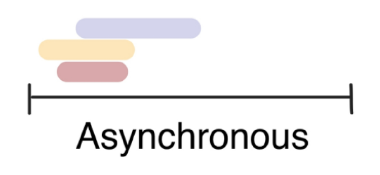

## JavaScript와 비동기

### Single Thread 언어, JavaScript 
Thread란? 
- > 작업을 처리할 때 실제로 작업을 수행하는 주체로, multi-thread라면 업무를 수행할 수 있는 주체가 여러 개라는 의미

#### JavaScript는 한번에 여러 일을 수행할 수 없다. 
- JavaScript는 한 번에 하나의 일만 수행할 수 있는 Single Thread 언어로 동시에 여러 작업을 처리할 수 없음 
- 즉, JavaScript는 하나의 작업을 요청한 순서대로 처리할 수 밖에 없음 

- > 그러면 어떻게 Single Thread인 JavaScript가 비동기 처리를 할 수 있을까?

## JavaScript Runtime

### JavaScript Runtime 
- "JavaScript가 동작할 수 있는 환경(Runtime)" 
    - "브라우저" 또는 "Node.js(`자바스크립트를 브라우저가 아닌 환경으로 꺼내줌 -> 다른 환경에서 동작 가능 -> 프론트, 백 가능`)" 
- JavaScript는 Single Thread이므로 비동기 처리를 할 수 있도록 도와주는 환경이 필요

### 브라우저 환경에서의 JavaScript 비동기 처리 관련 요소 
1. `JavaScript Engine의 Call Stack `

2. `Web API `
3. `Task Queue `
4. `Event Loop`

#### 런타임의 시각적 표현
```js
console.log('Hi') 

setTimeout(function myFunc() { 
    console.log('Work') 
}, 3000) 

console.log('Bye')
```
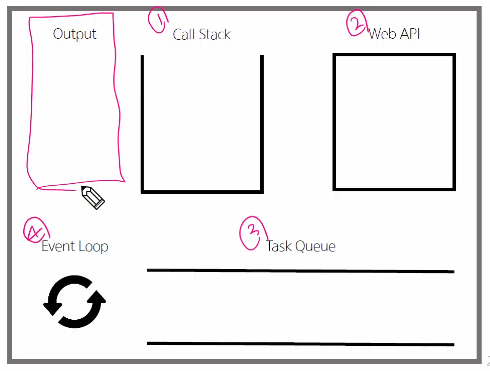

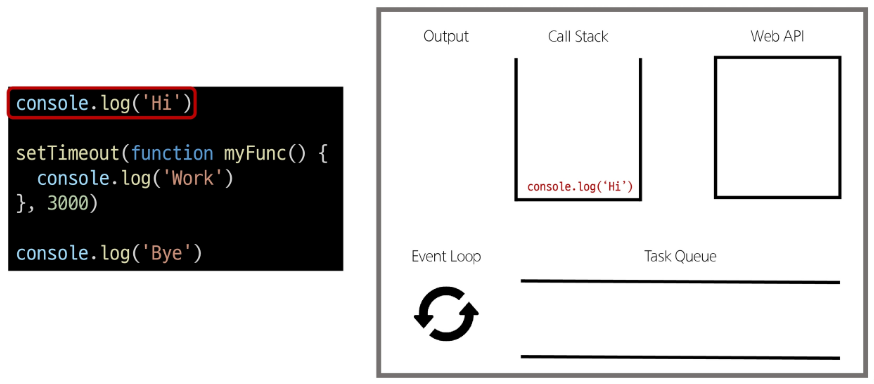

일단 콜 스택에 집어넣음. 모든 코드는 콜 스택에서 동작. 콜 스택에서 나오면서 호출됨

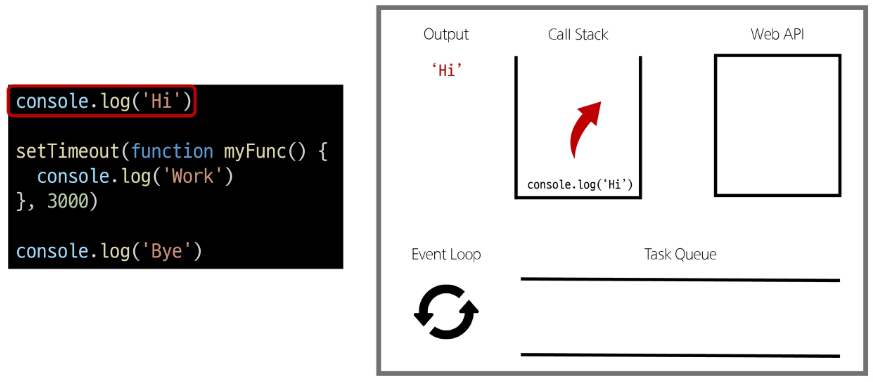

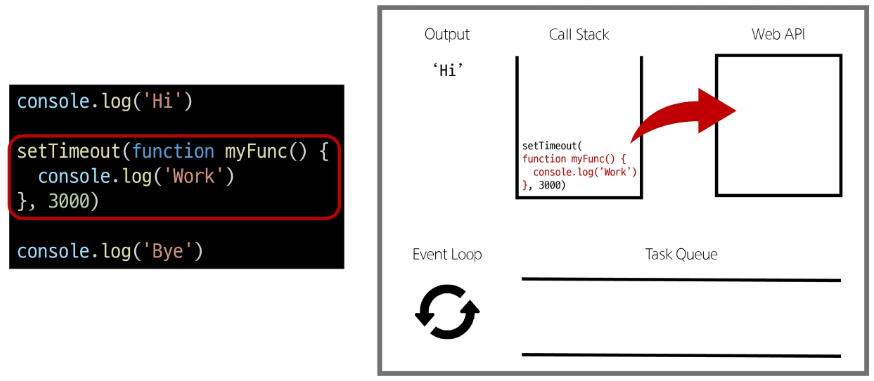

바로 처리가 안되면 Web API로 보내버림

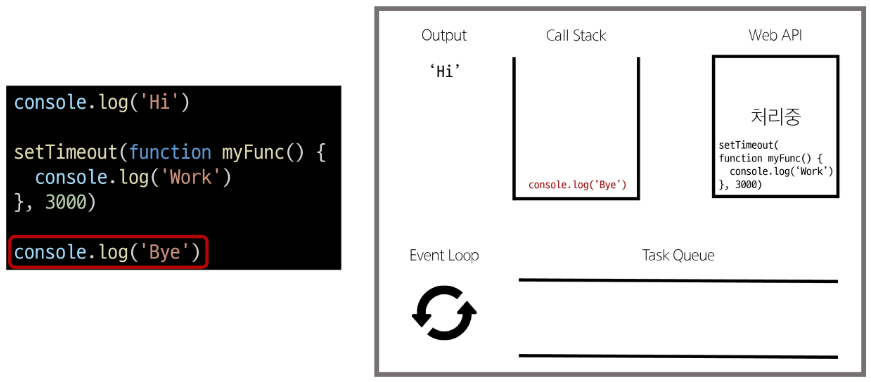

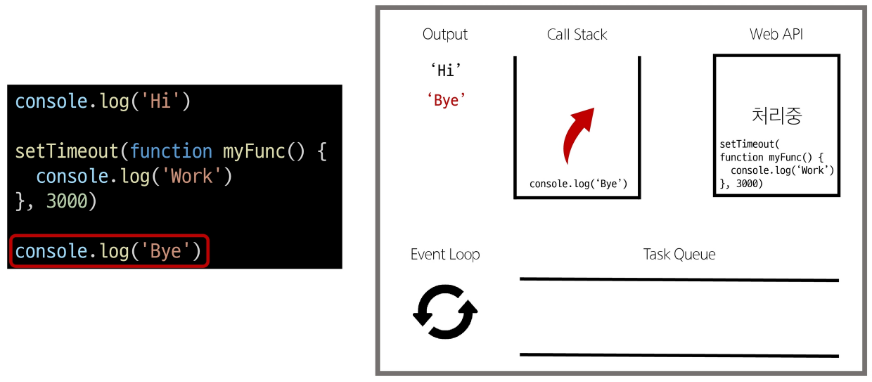

콜 스택이 비었으니 Bye를 처리

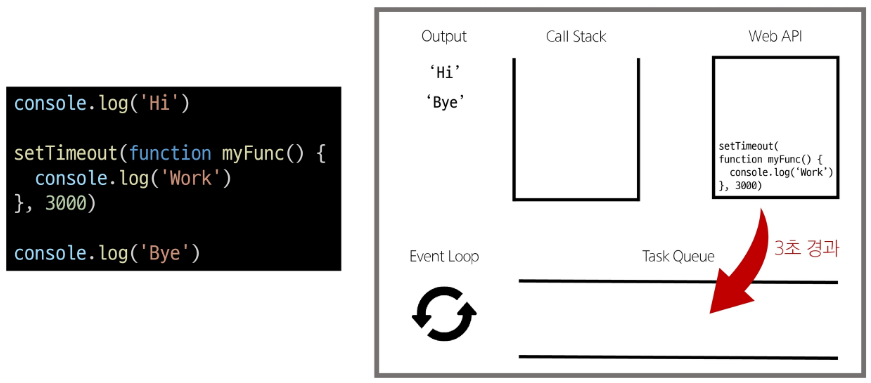

3초가 지나고 나서 Web API에서 콜 스택 말고 태스크 큐로 나감 -> 처리 완료 순으로 대기하는 공간

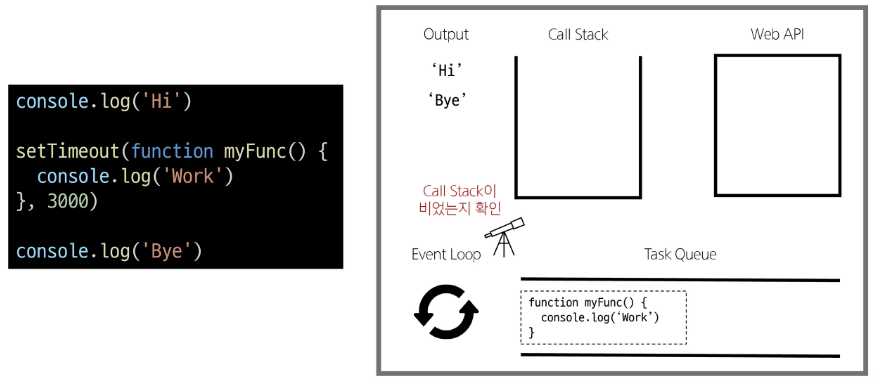

이벤트 루프가 콜 스택이랑 태스크 큐를 감시하고 있음. 콜 스택이 비었고 테스크 큐에 대기열이 있으면 콜 스택에 집어넣음.

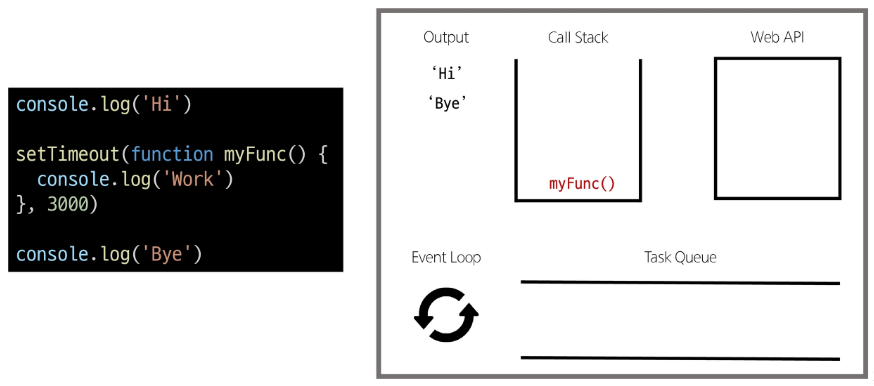

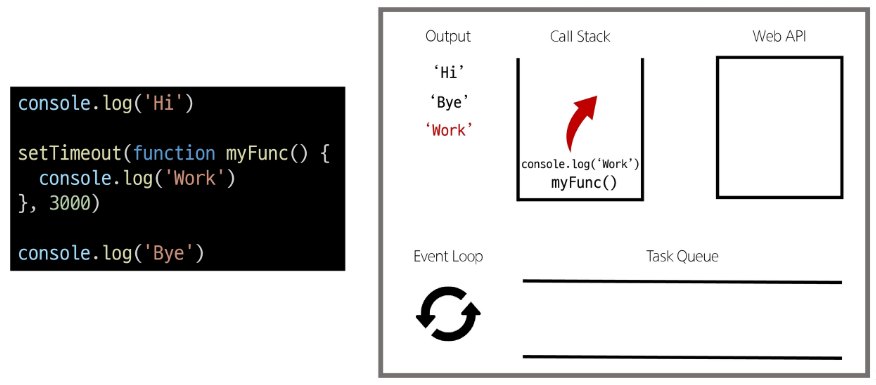

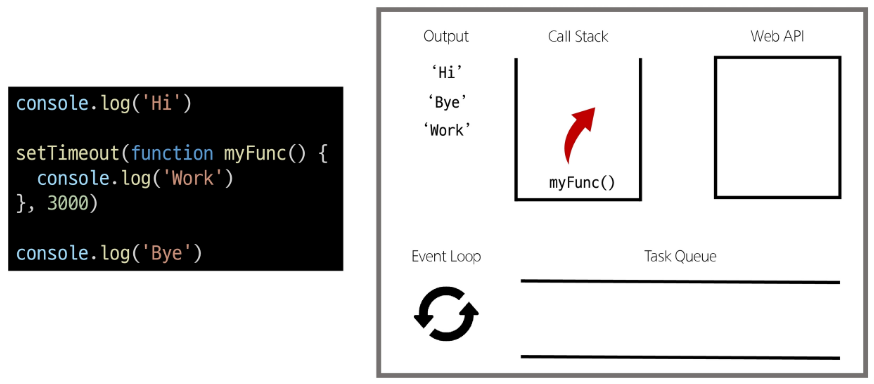

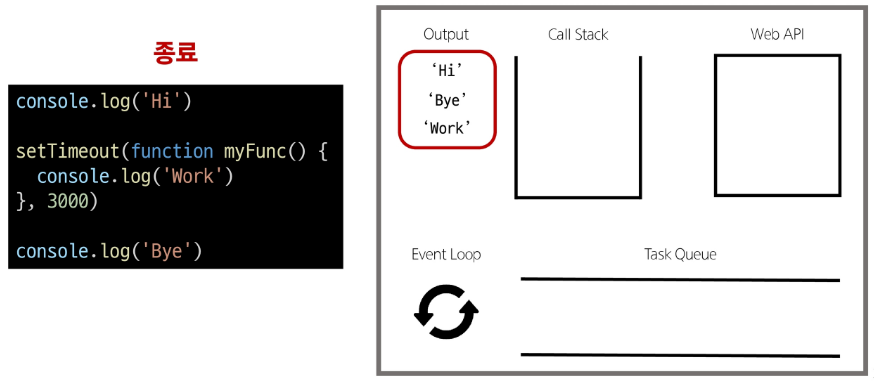

#### 브라우저 환경에서의 JavaScript 비동기 처리 동작 방식 
1. 모든 작업은 `Call Stack (LIFO)`으로 들어간 후 처리된다. 
2. 오래 걸리는 작업이 Call Stack으로 들어오면 `Web API`로 보내 별도로 처리하도록 한다. 
3. Web API에서 처리가 끝난 작업들은 곧바로 Call Stack으로 들어가지 못하고 `Task Queue (FIFO)`에 순서대로 들어간다. 
4. `Event Loop`가 Call Stack이 비어 있는 것을 계속 체크하고 Call Stack이 빈다면 Task Queue에서 가장 오래된(가장 먼저 처리되어 들어온) 작업을 Call Stack으로 보낸다.

#### 비동기 처리 동작 요소

1. Call Stack 
    - 요청이 들어올 때 마다 순차적으로 처리하는 Stack(LIFO) 
    - 기본적인 JavaScript의 Single Thread 작업 처리 

2. Web API 
    - JavaScript 엔진이 아닌 브라우저에서 제공하는 runtime 환경 
    - 시간이 소요되는 작업을 처리 (setTimeout, DOM Event, 비동기 요청 등)

3. Task Queue (Callback Queue) 
    - 비동기 처리된 Callback 함수가 대기하는 Queue(FIFO) 

4. Event Loop 
    - 태스크(작업)가 들어오길 기다렸다가 태스크가 들어오면 이를 처리하고, 처리할 태스크가 없는 경우엔 잠드는, 끊임없이 돌아가는 자바스크립트 내 루프 
    - Call Stack과 Task Queue를 지속적으로 모니터링 
    - Call Stack이 비어 있는지 확인 후 비어 있다면 Task Queue에서 대기 중인 오래된 작업을 Call Stack으로 Push


#### 정리 
- JavaScript는 한 번에 하나의 작업을 수행하는 Single Thread 언어로 동기적 처리를 진행 
- 하지만 브라우저 환경(브라우저 환경이 아니라면 Node.js)에서는 Web API에서 처리된 작업이 지속적으로 Task Queue를 거쳐 Event Loop에 의해 Call Stack에 들어와 순차적으로 실행됨으로써 비동기 작업이 가능한 환경이 됨

## Ajax

### 개요

#### Ajax 
##### Asynchronous JavaScript and XML 
비동기적인 웹 애플리케이션 개발을 위한 기술

#### Ajax 정의 
- `XML(XMLHttpRequest)` 기술을 사용해 복잡하고 동적인 웹 페이지를 구성하는 프로그래밍 방식 
- 브라우저와 서버 간의 데이터를 비동기적으로 교환하는 기술(XML)
- Ajax를 사용하면 페이지 전체를 새로고침 하지 않고도 동적으로 데이터를 불러와 화면을 갱신할 수 있음 
- > Ajax의 `'x'는 XML`이라는 데이터 타입을 의미하긴 하지만, 요즘은 더 가벼운 용량과 `JavaScript의 일부라는 장점 때문에 JSON`을 많이 사용

#### Ajax 목적 
1. 비동기 통신
    - 웹 페이지 전체를 `새로고침하지 않고` 서버와 데이터를 주고받을 수 있음 
2. 부분 업데이트 
    - 전체 페이지가 다시 로드되지 않고 HTML 페이지 `일부 DOM만 업데이트` 
    - 페이지의 일부분만 동적으로 갱신할 수 있어 `사용자 경험이 향상` 
3. 서버 부하 감소 
    - 필요한 데이터만 요청하므로 `서버의 부하를 줄일 수 있음`

#### XMLHttpRequest 객체 
##### (XHR) 
웹 브라우저와 서버 간의 비동기 통신을 가능하게 하는 JavaScript 객체

#### XMLHttpRequest 주요 기능 
- JavaScript를 사용하여 서버에 `HTTP 요청을 할 수 있는 객체` 
- 웹 페이지의 전체 새로고침 없이도 서버로부터 데이터를 가져오거나 보낼 수 있음 (구글 맵, 인스타그램, ~~)

- > 이름에 XML이라는 데이터 타입이 들어가긴 하지만 XML 뿐만 아니라 `모든 종류의 데이터를 가져올 수 있음`

#### 기존 기술과의 차이 - 기존 방식
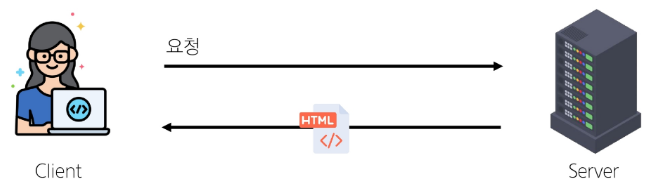
1. 클라이언트(브라우저)에서 form을 채우고 이를 서버로 제출(submit) 
2. 서버는 요청 내용에 따라 데이터 처리 후 새로운 웹페이지를 작성하여 응답으로 전달 
- > 결과적으로 모든 요청에 따라 새로운 페이지를 응답 받기 때문에 계속해서 새로고침이 발생 
- > 기존 페이지와 유사한 내용을 사지고 있는 경우 중복된 코드를 다시 전송 받음으로써 대역폭을 낭비하게 되는 경우가 많음

#### 기존 기술과의 차이 - Ajax
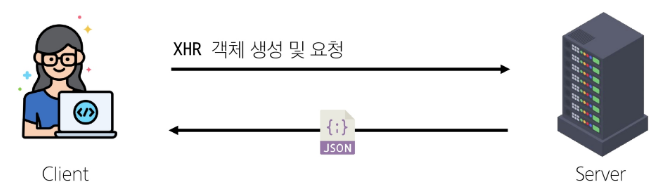
1. XHR 객체 생성 및 요청 
2. 서버는 새로운 페이지를 응답으로 만들지 않고 필요한 부분에 대한 데이터만 처리 후 응답 (JSON 및 기타 데이터) 
- > 새로운 페이지를 받는 것이 아닌 필요한 부분의 데이터만 받아 기존 페이지의 일부를 수정 (새로고침 X) 
- > 서버에서 모두 처리되던 데이터 처리의 일부분이 이제는 클라이언트 쪽에서 처리되므로 교환되는 데이터양과 처리량이 줄어듦

#### 이벤트 핸들러는 비동기 프로그래밍의 한 형태
- 이벤트가 발생할 때마다(다음 함수로 바로 넘어가버림) 호출되는 함수(콜백 함수)를 제공하는 것 
- HTTP 요청은 응답이 올때까지의 시간이 걸릴 수 있는 작업이라 비동기이며, 이벤트 핸들러를 XHR 객체에 연결해 요청의 진행 상태 및 최종 완료에 대한 응답을 받음

### `Axios`

#### Axios 
브라우저와 Node.js에서 사용할 수 있는 (Promise 기반의) HTTP 클라이언트 라이브러리

- > XHR 객체 생성, 요청, 응답까지 다 해줌

#### Axios 정의 및 특징 
- 클라이언트 및 서버 사이에 HTTP 요청을 만들고 응답을 처리하는 데 사용되는 자바스크립트 라이브러리 
- 서버와의 HTTP 요청과 응답을 간편하게 처리할 수 있도록 도와주는 도구 
- 브라우저를 위한 XHR 객체 생성 
- 간편한 API를 제공하며, Promise 기반의 비동기 요청을 처리 -> 뒤에서 다시
- > 주로 웹 애플리케이션에서 서버와 통신할 때 사용

#### Ajax를 활용한 클라이언트 서버 간 동작
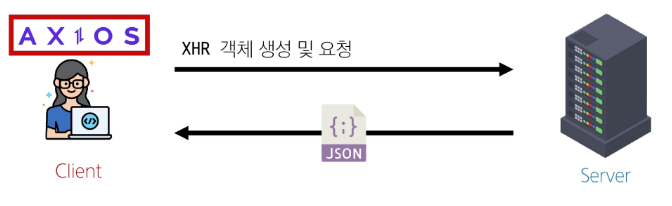

`XHR 객체 생성 및 요청` > `응답 데이터 생성` > `JSON 데이터 응답` > `Promise 객체 데이터`를 활용해 `DOM 조작` (웹 페이지의 일부분 만을 다시 로딩)

#### Axios 설치 및 사용 
- CDN 방식으로 사용하기 
- https://axios-http.com/ 
```js
    <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
```

#### "Promise" object
- 자바스크립트에서 비동기 작업을 처리하기 위한 객체 
- 비동기 작업의 최종 완료(또는 실패)와 그 결과값을 나타냄
```html
    <!-- axios.html --> 
```
```js 
    const promiseObj = axios({ 
        method: 'get',  
        url: 'https://api.thecatapi.com/v1/images/search' 
    })

    console.log(promiseobj) // Promise object
```
- 주요 메서드 
    - then(): 작업이 성공적으로 완료되었을 때 실행될 콜백 함수를 지정 
    - catch(): 작업이 실패했을 때 실행될 콜백 함수를 지정 
```html
    <!-- axios.html --> 
```
```js
    promiseObj 
        .then((response) => {  
            console.log(response) // Response object 
            console.log(response.data) // Response data 
        })
        .catch((error) => { 
            console.error(error) 
        })
```

#### Axios 기본 구조
- axios 객체를 활용해 요청을 보낸 후 응답 데이터 promise 객체를 받음 
```html
    <!-- axios.html --> 
```
```js
axios({ 
    method: 'get', 
    url: 'https://api.thecatapi.com/v1/images/search' 
}) 
    .then((response) => { 
        console.log(response) 
        console.log(response.data) 
    }) 
    .catch((error) => { 
        console.error(error)
    })
```
- 성공 처리 
    - then 메서드를 사용해서 "성공했을 때 수행할 로직"을 작성 
    - 서버로부터 받은 응답 데이터를 처리 

- 실패 처리 
    - catch 메서드를 사용해서 "실패했을 때 수행할 로직"을 작성 
    - 네트워크 오류나 서버 오류 등의 예외 상황을 처리
```js
    axios({ 
        method: 'post', 
        url: '/ user/12345', data: { 
            firstName: 'Fred',
            lastName: 'Flintstone'
        } 
    })   
        .then(콜백함수) 
        .catch(콜백함수)
```

#### then & catch 특징 
- then(callback)
    - 요청한 작업이 성공하면 callback 실행 
    - callback은 이전 작업의 성공 결과를 인자로 전달 받음 
- catch(callback) 
    - then()이 하나라도 실패하면 callback 실행 (남은 then은 중단) 
    - callback은 이전 작업의 실패 객체를 인자로 전달 받음

### Axios 활용

#### 고양이 사진 가져오기 실습
- The Cat API (https://api.thecatapi.com/v1/images/search) 
    - 이미지를 요청해서 가져오는 작업을 비동기로 처리하기 
- response 예시 
```js
// https://api.thecatapi.com/v1/images/search 
[ 
    { 
        "id": "d6n",
        "url ": "https://cdn2.thecatapi.com/images/d6n.jpg", 
        "width": 333, 
        "height": 500
    }
]
```
```html
<!-- cat-api.html --> 
 
<script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script> 
<script> 
    const URL = 'https://api.thecatapi.com/v1/images/search' 
    axios({ 
        method: 'get', 
        url: URL, 
    }) 
        .then((response) => { 
            console.log(response) 
            console.log(response.data) 
        }) 
        .catch((error) => { 
            console.log(error) 
            console.log('실패했다옹') 
        }) 
    console.log('야옹야옹') 
</script>
```
- 요청 후 cat api로부터 응답을 기다려야 하는 작업은 비동기로 처리하기 때문에 '야옹야옹' 출력 이후 응답 데이터가 출력되는 것을 확인 할 수 있음
 
    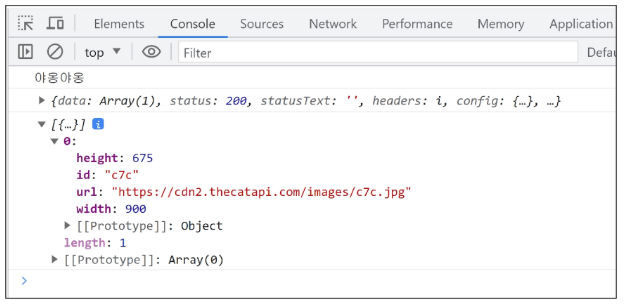

#### 고양이 사진 가져오기 실습 심화
1. 버튼을 누르면 
2. 고양이 이미지를 요청하고 
3. 요청이 처리되어 응답이 오면 
4. 응답 데이터에 있는 이미지 주소 값을 img 태그에 넣어 이미지 출력하기

##### 1. 버튼을 작성하고 axios 로직을 콜백 함수로 작성 및 이벤트 핸들러 부착 
```html
<!-- cat-api-ad.html --> 
 
<button>냥냥펀치</button> 
```
```js
const URL 'https://api.thecatapi.com/v1/images/search' 
const btn = document.querySelector('button') 

const getCats = function () { 
    axios({
        method: 'get', 
        url: URL,
    })  
        .then((response) => { 
            console.log(response) 
            console.log(response.data) 
        }) 
        .catch((error) => { 
            console.log(error) 
            console.log('실패했다옹') 
        }) 
    console.log('야옹야옹')
}  
btn.addEventListener('click', getCats)
```

##### 2. 응답 데이터에서 필요한 이미지 주소 값 찾기 
```js
const URL = 'https://api.thecatapi.com/v1/images/search' 
const btn = document.querySelector('button') 

const getCats = function () { 
    axios({ 
        method: 'get', 
        url: URL,
    })
        .then((response) => {
            console.log(response.data[0].url)   // <- 이거
        })
        .catch((error) => {
            console.log(error) 
            console.log('실패했다옹') 
        })
    console.log('야옹야옹') 
}

btn.addEventListener('click', getCats)
```

##### 3. 찾은 이미지 주소를 활용해 HTML img 태그 구성하기 
```js
const getCats = function () {
    axios({ 
        method: 'get', 
        url: URL,
    }) 
        .then((response) => {
            const imgUrl = response.data[0].url 
            const imgElem = document.createElement('img') 
            imgElem.setAttribute('src ', imgUrl) 
            document.body.appendChild(imgElem) 
        })
        .catch((error) => {
            console.log(error) 
            console.log('실패했다옹') 
        })
        console.log('야옹야옹') 
}

btn.addEventListener('click', getCats)
```

##### 4. 결과 확인
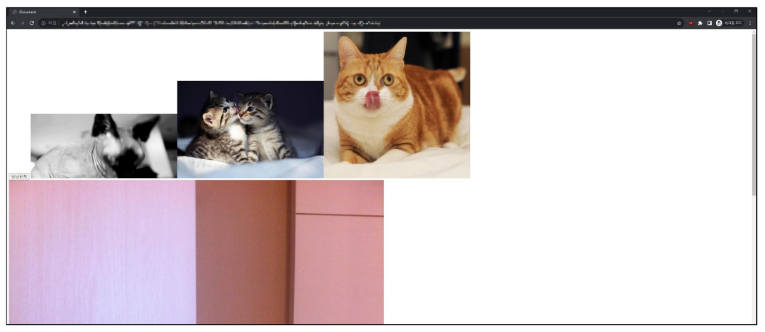

### Ajax와 Axios

#### Ajax와 Axios 정리
- Ajax 
    - 하나의 특정한 기술을 의미하는 것이 아니라, 비동기적인 웹 애플리케이션 개발에 사용하는 기술들의 집합을 지칭

- Axios 
    - 클라이언트 및 서버 사이에 HTTP 요청을 만들고 응답을 처리하는 데 사용되는 자바스크립트 라이브러리 
    - Promise API를 기반으로 하여 비동기 처리를 더 쉽게 할 수 있음 

- > 프론트엔트에서 Axios를 활용해 DRF로 만든 API 서버로 요청을 보내고, 받아온 데이터를 비동기적으로 처리하는 로직을 작성하게 됨

- Ajax는 개념이자 접근 방식이며, Axios는 이를 실현하는 구체적인 도구 

- Axios는 Ajax를 구현하는 도구 중 하나로, XMLHttpRequest를 추상화하여 더 사용하기 쉽게 만든 라이브러리

## Callback과 Promise

### 비동기 처리의 특성과 관리
- 비동기 처리의 특성 
    - 비동기 처리의 핵심은 작업이 시작되는 순서가 아니라 `완료되는 순서`에 따라 처리된다는 것

- 비동기 처리의 어려움 
    - 개발자 입장에서 코드의 실행 순서가 불명확하다는 단점 존재 
    - 이로 인해 실행 결과를 정확히 예측하며 코드를 작성하기 어려울 수 있음

### 비동기 처리 관리 방법 
1. 비동기 콜백 
    - 비동기 작업이 완료된 후 실행될 함수를 미리 정의 

2. Promise 
    - 비동기 작업의 최종 완료 또는 실패를 나타내는 객체

### 비동기 콜백

#### 비동기 콜백 
- 비동기적으로 처리되는 작업이 완료되었을 때 실행되는 함수 
- 연쇄적으로 발생하는 비동기 작업을 순차적으로 동작할 수 있게 함 
- > 작업의 순서와 동작을 제어하거나 결과를 처리하는 데 사용 
```js
    const asyncTask = function (callback) {
        setTimeout(function () { 
            console.log('비동기 작업 완료') 
            callback() // 작업 완료 후 콜백 호출 
        }, 2000) // 1초 후에 작업 완료 
    }

    // 비동기 작업 수행 후 콜백 실행 
    asyncTask(function () { 
        console.log('작업 완료 후 콜백 실행') 
    })

    // 출력 결과 
    // 비동기 작업 완료 
    // 작업 완료 후 콜백 실행
```

#### 비동기 콜백의 한계 
- 비동기 콜백 함수는 보통 어떤 기능의 실행 결과를 받아서 다른 기능을 수행하기 위해 많이 사용됨 

- 이 과정을 작성하다 보면 비슷한 패턴이 계속 발생 
    - A를 처리해서 결과가 나오면, 첫 번째 callback 함수를 실행하고 첫 번째 callback 함수가 종료되면, 두 번째 callback 함수를 실행하고 두 번째 callback 함수가 종료되면, 세 번째 callback 함수를 실행하고... 

- > "콜백 지옥” 발생

#### 콜백 지옥 (Callback Hell) 
- 비동기 처리를 위한 콜백을 작성할 때 마주하는 문제 
- 코드 작성 형태가 마치 “피라미드와 같다"고 해서 "Pyramid of doom(파멸의 피라미드)"라고도 부름
```js
function hell (win) { 
    return function () { 
        loadLink(win, REMOTE_SRC, function () { 
            loadLink(win, REMOTE SRC, function () { 
                loadLink(win, REMOTE SRC, function () { 
                    loadLink (win, REMOTE SRC, function () { 
                        loadLink(win, REMOTE SRC, function () { 
                            LoadLink(win, REMOTE SRC, function () {
                            })
                        })
                    })
                })
            })
        })
    }
}
```

#### 콜백 함수 정리 
- 콜백 함수는 비동기 작업을 순차적으로 실행할 수 있게 하는 반드시 필요한 로직 
- 비동기 코드를 작성하다 보면 콜백 함수로 인한 콜백 지옥은 빈번히 나타나는 문제이며 이는 코드의 가독성을 해치고 유지 보수가 어려워짐 

- > 지옥에 빠지지 않는 다른 표기 형태가 필요하다!

### 프로미스

#### Promise 
JavaScript에서 비동기 작업의 결과를 나타내는 객체 
- >비동기 작업이 완료되었을 때 결과 값을 반환하거나, 실패 시 에러를 처리할 수 있는 기능을 제공

#### "Promise" object
- 자바스크립트에서 비동기 작업을 처리하기 위한 객체
- 비동기 작업의 성공 또는 실패와 관련된 결과나 값을 나타냄 
- 콜백 지옥 문제를 해결하기 위해 등장한 비동기 처리를 위한 객체 
- "작업이 끝나면 실행 시켜 줄게" 라는 `약속`

- > Promise 기반의 HTTP 클라이언트 라이브러리가 바로 Axios

#### Axios 
브라우저와 Node.js에서 사용할 수 있는 Promise 기반의 HTTP 클라이언트 라이브러리

#### 비동기 콜백 vs Promise

```js
// 비동기 콜백 방식 
work1(function () { 
    // 첫번째 작업 ...
    work2(result1, function (result2) { 
        // 두번째 작업 ...
        work3(result2, function (result3) {
            console.log('최종 결과 :' + result3)
        })
    })
})
```
```js
// promise 방식 
work1() 
    .then((result1) => { 
        // work2 
        return result2 
    }) 
    .then((result2) => { 
        // work3
        return result3
    })
    .catch((error) => { 
        // error handling
    })
```

#### then & catch의 chaining 
- axios로 처리한 비동기 로직은 항상 `promise 객체를 반환 `
- 즉, then과 catch는 모두 항상 promise 객체를 반환 
    - > 계속해서 chaining을 할 수 있음 
- then을 계속 이어 나가면서 작성할 수 있게 됨 
```js
    axios({}).then(...).then(...).catch(...)
```
```js
axios({}) // Promise 객체 return 
    .then(성공하면 수행할 1번 콜백함수) 
    .then(1번 콜백함수가 성공하면 수행할 2번 콜백함수) 
    .then(2번 콜백함수가 성공하면 수행할 3번 콜백함수) 
    ...
    .catch(실패하면 수행할 콜백함수)
```

#### then 메서드 chaining의 목적
- 비동기 작업의 "순차적인" 처리 가능 
- 코드를 보다 직관적이고 가독성 좋게 작성할 수 있도록 도움

#### then 메서드 chaining 적용
chaining을 활용해 cat api 실습 코드 개선하기
```js
// 개선 전
.then((response) => { 
    imgUrl = response.data[0].url 
    imgElem = document.createElement('img') 
    imgElem.setAttribute('src', imgUrl) 
    document.body.appendChild(imgElem)
}) 
```
```js
// 개선 후
.then((response) => { 
    imgUrl = response.data[0].url 
    return imgUrl 
}) 
.then((imgData) => { 
    imgElem = document.createElement('img') 
    imgElem.setAttribute('src ', imgData) 
    document.body.appendChild(imgElem)
}) 
```
첫번째 then 콜백함수의 반환 값이 이어지는 then 콜백함수의 인자로 전달됨

#### then 메서드 chaining의 장점 
1. 가독성
    - 비동기 작업의 순서와 의존 관계를 명확히 표현할 수 있어 코드의 가독성이 향상 

2. 에러 처리 
    - 각각의 비동기 작업 단계에서 발생하는 에러를 분할에서 처리 가능 

3. 유연성 
    - 각 단계마다 필요한 데이터를 가공하거나 다른 비동기 작업을 수행할 수 있어서 더 복잡한 비동기 흐름을 구성할 수 있음 

4. 코드 관리 
    - 비동기 작업을 분리하여 구성하면 코드를 관리하기 용이

#### Promise가 제공하는 이점 (비동기 콜백과 비교)
1. `실행 순서`의 보장 
    - 콜백 함수: JavaScript의 Event Loop가 현재 실행 중인 Call Stack을 완료하기 전에는 호출되지 않음 
    - Promise: then/catch 메서드의 콜백 함수는 Event Queue에 배치되는 순서대로 엄격하게 호출됨 
    - > 이는 비동기 작업의 실행 순서를 더 예측 가능하게 만듦

2. 유연한 비동기 처리 
    - Promise는 비동기 작업이 완료된 후에도 then 메서드를 통해 콜백을 추가할 수 있음

3. 체이닝(Chaining)을 통한 연속적인 비동기 처리 
    - then 메서드를 여러 번 연결하여 여러 개의 콜백 함수를 순차적으로 실행할 수 있음 
    - 각 콜백은 주어진 순서대로 실행되며, 이전 Promise의 결과를 다음 then에서 사용할 수 있음 
    - 복잡한 비동기 로직을 명확하게 표현할 수 있음

4. 에러 처리의 일원화 
    - catch 메서드를 통해 Promise 체인 전체의 에러를 한 곳에서 처리할 수 있음 
    - 전통적인 콜백 방식에서 각 콜백마다 에러 처리를 해야 하는 번거로움을 해소

#### Promise 정리
- Promise는 비동기 프로그래밍의 복잡성을 줄이고, 코드의 가독성과 유지보수성을 높이는 강력한 도구 
- 실행 순서 보장, 체이닝, 에러 처리 등의 특징을 통해 콜백 지옥을 피하고 더 체계적인 비동기 코드 작성을 가능하게 함

## 참고

### 비동기 처리와 사용자 경험

#### 비동기 처리가 사용자 경험에 미치는 영향 
1. 동기식 처리의 한계 
    - 큰 데이터를 불러오는 작업을 동기식으로 처리할 경우, 데이터 로딩이 완료될 때까지 `전체 앱의 실행이 차단`됨 
    - 이로 인해 사용자는 앱이 멈추거나 응답하지 않는 것처럼 느낄 수 있음 
    - 특정 작업이 완료될 때까지 다른 모든 작업이 대기해야 하므로, 전반적인 앱의 반응성이 저하됨

2. 비동기 처리의 장점 
    - 시간이 오래 걸리는 작업(예: 데이터 로딩, API 호출)을 백그라운드에서 처리할 수 있음 
    - 주요 실행 흐름이 차단되지 않아 사용자 인터페이스가 계속 반응할 수 있음 
    - 데이터나 작업 결과가 준비되는 대로 순차적으로 화면에 표시할 수 있어, 사용자에게 진행 상황을 보여줄 수 있음

3. `사용자 경험 향상 (UI, UX) -> 궁극적인 목적`
    - 비동기 처리를 통해 앱이 더 빠르고 반응적으로 느껴지게 할 수 있음 
    - 로딩 인디케이터나 부분적 콘텐츠 업데이트를 통해 사용자에게 진행 상황을 알려줄 수 있음 
    - 사용자는 전체 데이터가 로드되기를 기다리지 않고도 앱의 일부 기능을 사용할 수 있음

### 비동기 처리 적용 사례

#### 비동기 처리 적용 사례 
1. 소셜 미디어 피드
    - 스크롤하면서 새로운 콘텐츠를 비동기적으로 로드 (새로고침 하느라 위로 다시 올라가지 않음)

2. 검색 자동완성 
    - 사용자가 입력하는 동안 실시간으로 추천 검색어를 제공 

3. 대시보드 
    - 여러 데이터 소스에서 정보를 비동기적으로 가져와 표시

### 비동기 처리 주의사항

#### 비동기 처리 주의사항
비동기 처리가 항상 최선은 아니며, 작업의 특성과 데이터의 중요도에 따라 적절히 선택해야 함